# 연령별 취업자수 관계

- 국가통계포털 에서 <mark>행정구역(시도)/성/연령별 취업자</mark> 데이터 다운로드
- 전처리하기
  <hr></hr>
  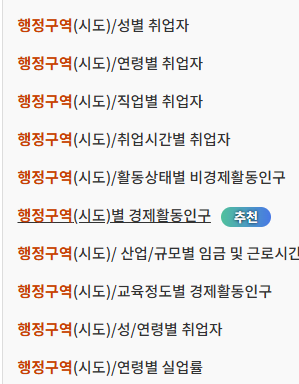 
  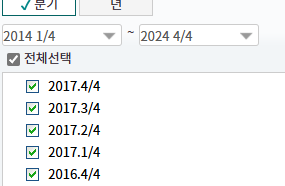 

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import pandas as pd
from prophet import Prophet

In [ ]:
fontlist = fm.findSystemFonts(fontpaths=None, fontext="ttf")
fontlist
path = "C:\\Windows\\Fonts\\NanumGothic.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc("font", family=font_name)

In [ ]:
ori = pd.read_csv("./ref/행정구역시도성연령별취업자.csv", encoding="EUC-KR")
ori.head()

In [ ]:
ex_data = ori.copy() #원복 복사
ex_data.columns = ["resion","year","age","gender","value"] #컬럼 이름 변경
ex_data.loc[ex_data["resion"] =="세종특별자치시", "value"] = ex_data.loc[ex_data["resion"] =="세종특별자치시", "value"].replace("-",0) # 세종시의 값 수정(17년도 전 값이 -로 되어있음)
ex_data

In [ ]:
ex_data["value"] = ex_data["value"].astype(int) # 게산하기 위해 int로 수정
ex1_data = ex_data.groupby('year')["value"].sum().reset_index(name="total") # 컬럼값 합산
ex1_data

In [ ]:
ax = ex1_data.plot(x="year", y="total",figsize=(14,8), title="년도별 취업자 수")
ax.set_xticks(range(len(ex1_data)))
ax.set_xticklabels(ex1_data["year"],rotation=45)
plt.show()

In [41]:
ex5_data = ex1_data
ex5_data = ex5_data.rename(columns={"year":"ds","total":"y"})
ex_data
ex5_data["ds"] = ex5_data["ds"].str.replace(".","-")
ex5_data["ds"] = ex5_data["ds"].str.replace("/","-")
#ex5_data

In [42]:
m= Prophet()
m.fit(ex5_data)

12:28:30 - cmdstanpy - INFO - Chain [1] start processing
12:28:30 - cmdstanpy - INFO - Chain [1] done processing


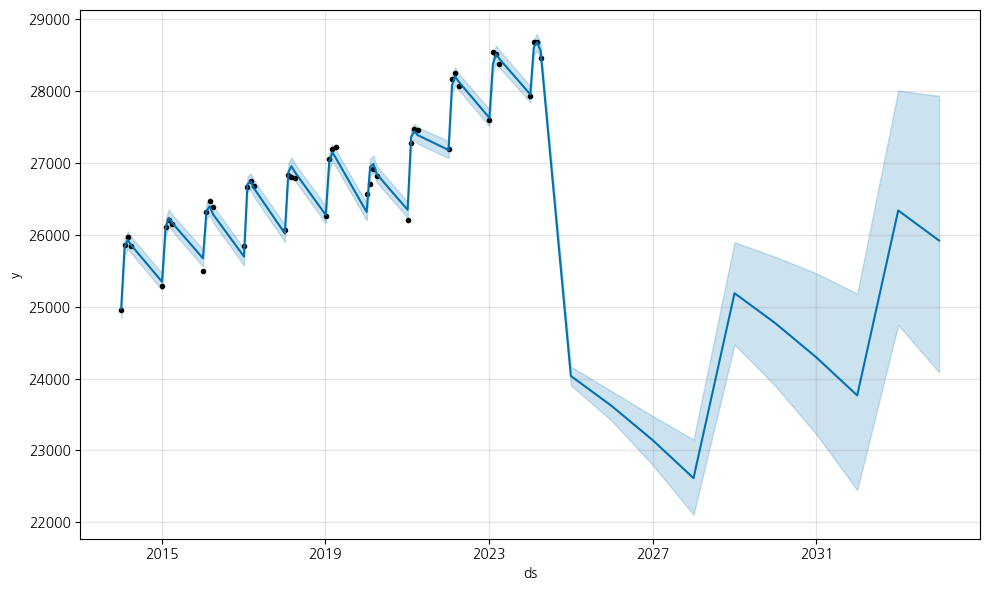

<Figure size 1000x1500 with 0 Axes>

In [43]:
future = m.make_future_dataframe(periods=10,freq='YE') # 10년 후까지의 데이터 예측
forecast = m.predict(future)   # fit 한 값을 토대로 predict 하는 것 !!
fig1 = m.plot(forecast)
plt.savefig("./ref/chart/예측_취업.png")
plt.figure(figsize=(10,15))
plt.show()

In [ ]:
gender_data = ex_data.set_index("gender")
#male_data = gender_data.loc["남자","value"].reset_index()
#female_data = gender_data.loc["여자","value"].reset_index()
male_data = gender_data.drop("여자",axis=0)
female_data = gender_data.drop("남자",axis=0)

In [ ]:
male_data["value"] = male_data["value"].astype(int) # 게산하기 위해 int로 수정
male_data = male_data.groupby('year')["value"].sum().reset_index(name="total") # 컬럼값 합산
male_data

In [ ]:
female_data["value"] = female_data["value"].astype(int) # 게산하기 위해 int로 수정
female_data = female_data.groupby('year')["value"].sum().reset_index(name="total") # 컬럼값 합산
female_data

In [ ]:
#내가 한거
ax1 = ex1_data.plot(x="year", y="total",figsize=(15,5), title="년도별 취업자 수")
ax1.set_xticks(range(len(ex1_data)))
ax1.set_xticklabels(ex1_data["year"],rotation=45)

ax2 = male_data.plot(x="year", y="total",figsize=(15,5), title="성별 취업자 수(남)")
ax2.set_xticks(range(len(male_data)))
ax2.set_xticklabels(male_data["year"],rotation=45)

ax3 = female_data.plot(x="year", y="total",figsize=(15,5), title="성별 취업자 수(여)")
ax3.set_xticks(range(len(female_data)))
ax3.set_xticklabels(female_data["year"],rotation=45)

plt.show()

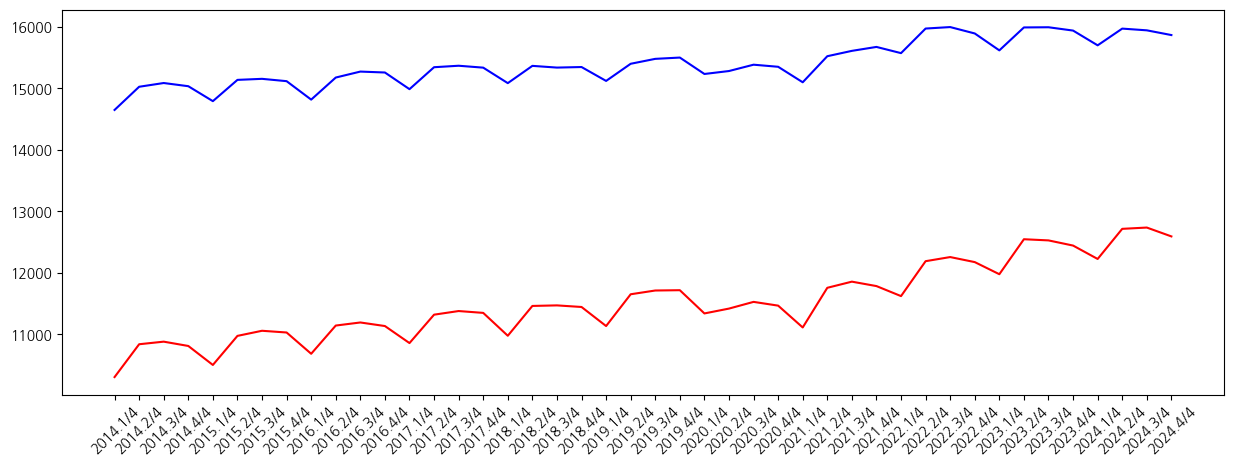

In [40]:
plt.figure(figsize=(15,5))
plt.plot(male_data["year"],male_data["total"], color="blue")
plt.plot(female_data["year"],female_data["total"], color="red")
plt.xticks(range(len(ex1_data)))
plt.xticks(ex1_data["year"],rotation=45)
plt.show()

### 연령별 취업자수

- 전반적인 데이터 분석

전반적으로 남녀 취업율은 과거에 비해 증가한 것으로 보임
남성의 취업율 증가폭은 일정한 간격으로 오르고 있음. 반면 여성의 취업율 증가폭은 남성에 비해 큰 증가폭을 보이고 있으며 과거 2014년 1/4분기에 비해 2024년 4/4분기는 3배 이상에 증가폭을 보여주고 있어 과거에 비해 여성의 취업율이 크게 증가하였다고 볼 수 있음.
연도별로 1/4분기와 4/4분기가 취업율이 낮으며 2/4분기와 3/4분기가 취업율이 높은것으로 확인됨

In [44]:
ex3_data = ori.copy()
ex3_data.loc[:,"데이터"] = ex3_data.loc[:,"데이터"].replace("-",0).astype(int)

In [45]:
filter0 = (ex3_data["시점"]>="2024.1/4")# & (ex3_data["시점"]< "2019.1/4") # 파이썬은 날짜도 부등호로 계산할 수 있다.
ex3_data = ex3_data[filter0]
ex3_data.head(20)

,시도별,시점,연령계층별,성별,데이터
400,서울특별시,2024.1/4,20 - 29세,남자,366
401,서울특별시,2024.1/4,20 - 29세,여자,518
402,서울특별시,2024.1/4,30 - 39세,남자,635
403,서울특별시,2024.1/4,30 - 39세,여자,571
404,서울특별시,2024.1/4,40 - 49세,남자,617
405,서울특별시,2024.1/4,40 - 49세,여자,457
406,서울특별시,2024.1/4,50 - 59세,남자,626
407,서울특별시,2024.1/4,50 - 59세,여자,485
408,서울특별시,2024.1/4,60세이상,남자,518
409,서울특별시,2024.1/4,60세이상,여자,397


In [64]:
x_data = ex3_data[ex3_data["연령계층별"].isin(["20 - 29세"])]
#x_data.loc[:,"데이터"] = x_data.loc[:,"데이터"].astype(int)

y_data = ex3_data[ex3_data["연령계층별"].isin(["60세이상"])]
#y_data.loc[:,"데이터"] = y_data.loc[:,"데이터"].astype(int)

z_data = ex3_data
#z_data.loc[:,"데이터"] = z_data.loc[:,"데이터"].astype(int)
x = x_data.groupby("시도별")["데이터"].sum()#.reset_index(name="total") #20대 취업자
y = y_data.groupby("시도별")["데이터"].sum()#.reset_index(name="total") #60대(정년퇴직) 취업자
z = z_data.groupby("시도별")["데이터"].sum()#.reset_index(name="total")
x

시도별
강원도         380
경기도        4169
경상남도        601
경상북도        563
광주광역시       374
대구광역시       531
대전광역시       453
부산광역시       876
서울특별시      3349
세종특별자치시      88
울산광역시       242
인천광역시       855
전라남도        353
전라북도        391
제주도         160
충청남도        594
충청북도        473
Name: 데이터, dtype: object

In [63]:
import numpy as np

regions = list(x["시도별"]) #라벨
colors = [np.random.rand(3,) for _ in range(len(regions))] # 랜덤색상 color

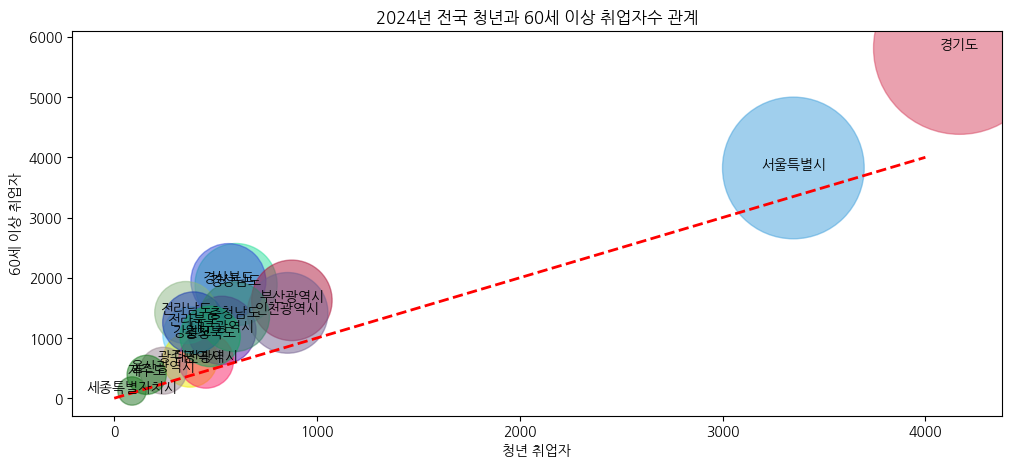

In [65]:
fig , ax = plt.subplots(figsize=(12,5))
z = np.array(z, dtype=float)
scatter = ax.scatter(x,y,s=z*0.5,c=colors,alpha = 0.5)

for n in range(len(regions)):
    ax.annotate(regions[n],xy=(x.iloc[n], y.iloc[n]),ha = "center")

ax.plot([0,4000],[0,4000], color="r", linestyle="--", linewidth=2)

ax.set_title("2024년 전국 청년과 60세 이상 취업자수 관계")
ax.set_xlabel("청년 취업자")
ax.set_ylabel("60세 이상 취업자")
#ax.set_slabel
plt.show()